Dataset : 1566 romances

=== ANALYSE COMPLÈTE DES SOUS-GENRES PRINCIPAUX ===

          Sous-genre  Nombre Pourcentage Note moyenne Avis moyens Pages moyennes
Contemporary Romance     230       14.7%         3.79       31531            356
  Historical Romance     163       10.4%         3.93       22674            426
  Paranormal Romance     136        8.7%         3.97       56390            377
   Romantic Suspense      89        5.7%         3.86        4105            354
     Fantasy Romance      16        1.0%         3.98        6062            500
      Erotic Romance      15        1.0%         3.85        3662            304


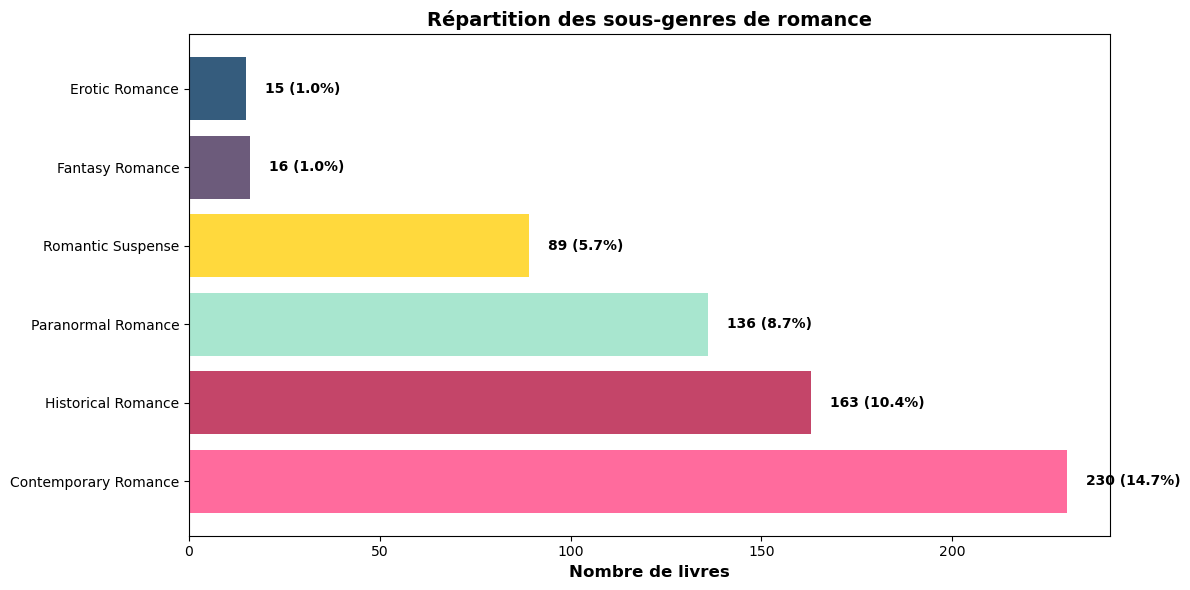

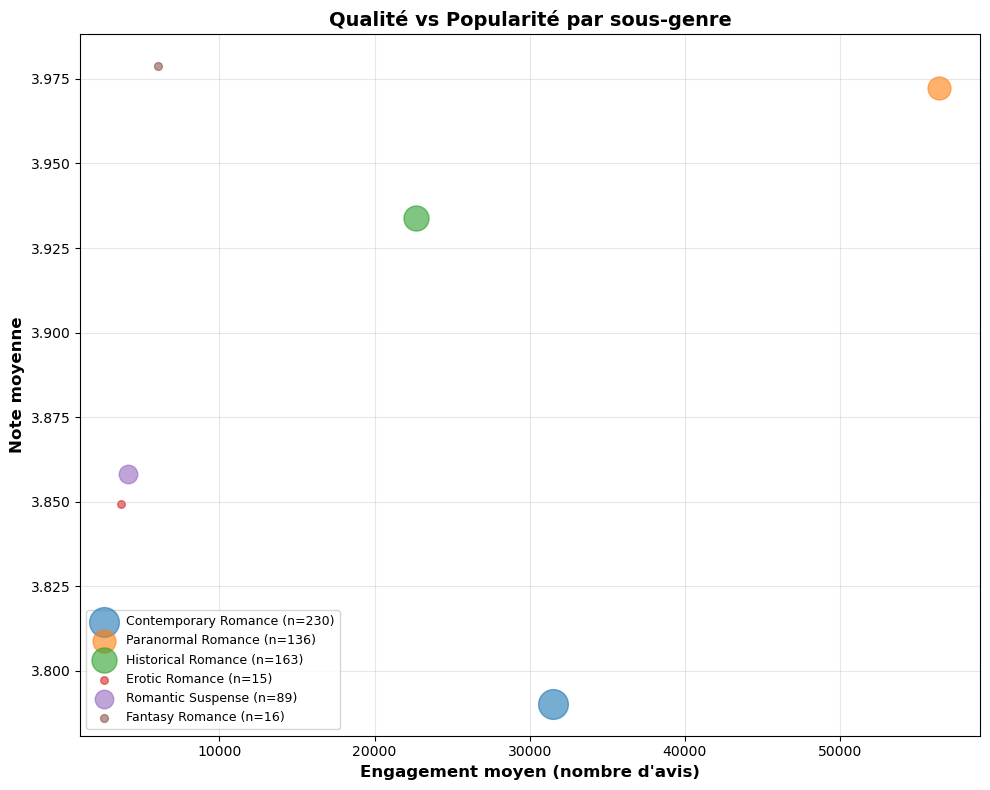

C:\Users\lucie\AppData\Local\Temp\ipykernel_2084\2286355452.py:127: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(ratings_data, labels=labels, patch_artist=True)


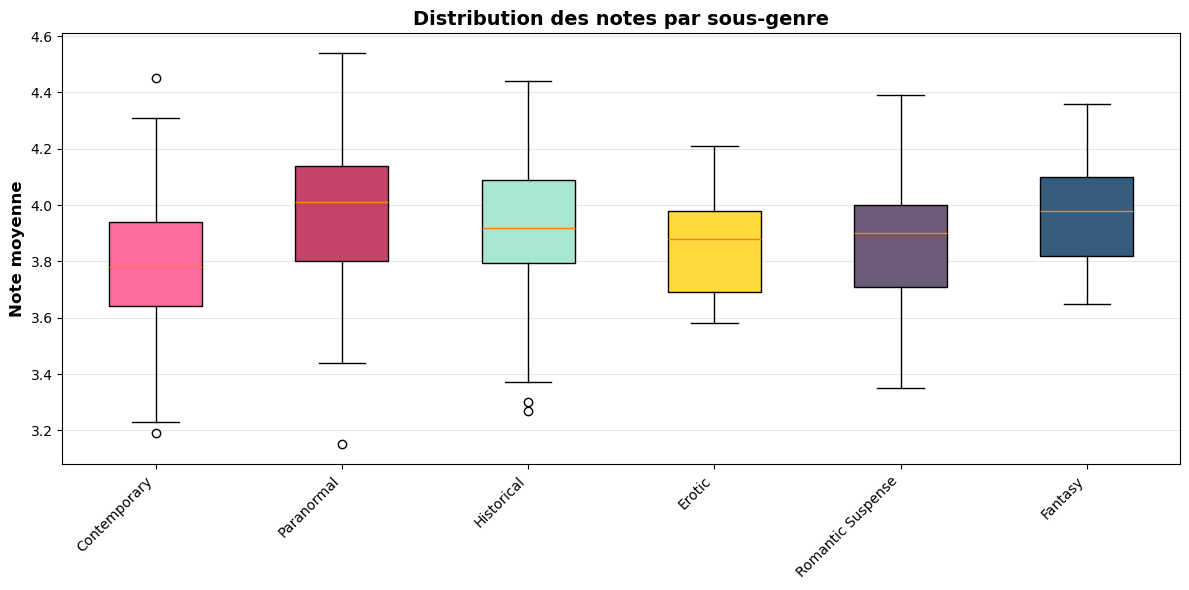


✅ Toutes les visualisations sont sauvegardées !
✅ Statistiques sauvegardées dans subgenres_statistics.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df_romance = pd.read_csv("../data/processed/romance_books_clean.csv", 
                         encoding='utf-8', sep=';')

print(f"Dataset : {len(df_romance)} romances\n")

# ========================================
# DÉFINIR LES SOUS-GENRES PRINCIPAUX
# ========================================

# On prend les sous-genres avec >100 occurrences pour avoir des stats fiables
subgenres = {
    'Contemporary': 'Contemporary Romance',
    'Paranormal': 'Paranormal Romance',
    'Historical': 'Historical Romance',
    'Erotic': 'Erotic Romance',
    'Suspense': 'Romantic Suspense',
    'Fantasy': 'Fantasy Romance'
}

# Créer les colonnes
for key, genre_name in subgenres.items():
    df_romance[f'is_{key.lower()}'] = df_romance['genres'].str.contains(genre_name, case=False, na=False)

# ========================================
# STATISTIQUES PAR SOUS-GENRE
# ========================================

results = []

for key, genre_name in subgenres.items():
    mask = df_romance[f'is_{key.lower()}']
    count = mask.sum()
    
    if count > 0:  # Éviter division par zéro
        avg_rating = df_romance[mask]['average_rating'].mean()
        avg_engagement = df_romance[mask]['ratings_count'].mean()
        avg_pages = df_romance[mask]['num_pages'].mean()
        
        results.append({
            'Sous-genre': genre_name,
            'Nombre': count,
            'Pourcentage': f"{count/len(df_romance)*100:.1f}%",
            'Note moyenne': f"{avg_rating:.2f}",
            'Avis moyens': f"{avg_engagement:.0f}",
            'Pages moyennes': f"{avg_pages:.0f}"
        })

# Créer un DataFrame des résultats
df_results = pd.DataFrame(results)
df_results = df_results.sort_values('Nombre', ascending=False)

print("=== ANALYSE COMPLÈTE DES SOUS-GENRES PRINCIPAUX ===\n")
print(df_results.to_string(index=False))

# ========================================
# VISUALISATION 1 : Répartition
# ========================================

plt.figure(figsize=(12, 6))
colors = ['#FF6B9D', '#C44569', '#A8E6CF', '#FFD93D', '#6C5B7B', '#355C7D']

bars = plt.barh(df_results['Sous-genre'], 
                [int(x) for x in df_results['Nombre']], 
                color=colors)

plt.xlabel('Nombre de livres', fontsize=12, fontweight='bold')
plt.title('Répartition des sous-genres de romance', fontsize=14, fontweight='bold')

# Ajouter les valeurs
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f"{int(width)} ({df_results.iloc[i]['Pourcentage']})",
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../visuals/repartition_subgenres_complet.png', dpi=300, bbox_inches='tight')
plt.show()

# ========================================
# VISUALISATION 2 : Notes vs Engagement
# ========================================

plt.figure(figsize=(10, 8))

for key, genre_name in subgenres.items():
    mask = df_romance[f'is_{key.lower()}']
    if mask.sum() > 0:
        avg_rating = df_romance[mask]['average_rating'].mean()
        avg_engagement = df_romance[mask]['ratings_count'].mean()
        count = mask.sum()
        
        # Taille du point = nombre de livres
        plt.scatter(avg_engagement, avg_rating, 
                   s=count*2, alpha=0.6, 
                   label=f"{genre_name} (n={count})")

plt.xlabel('Engagement moyen (nombre d\'avis)', fontsize=12, fontweight='bold')
plt.ylabel('Note moyenne', fontsize=12, fontweight='bold')
plt.title('Qualité vs Popularité par sous-genre', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../visuals/qualite_vs_popularite.png', dpi=300, bbox_inches='tight')
plt.show()

# ========================================
# VISUALISATION 3 : Comparaison notes
# ========================================

plt.figure(figsize=(12, 6))

ratings_data = []
labels = []

for key, genre_name in subgenres.items():
    mask = df_romance[f'is_{key.lower()}']
    if mask.sum() > 10:  # Au moins 10 livres pour être pertinent
        ratings_data.append(df_romance[mask]['average_rating'])
        labels.append(genre_name.replace(' Romance', ''))

box = plt.boxplot(ratings_data, labels=labels, patch_artist=True)

# Colorier les boîtes
colors = ['#FF6B9D', '#C44569', '#A8E6CF', '#FFD93D', '#6C5B7B', '#355C7D']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('Note moyenne', fontsize=12, fontweight='bold')
plt.title('Distribution des notes par sous-genre', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('../visuals/distribution_notes_subgenres.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Toutes les visualisations sont sauvegardées !")

# Sauvegarder les résultats
df_results.to_csv('../data/processed/subgenres_statistics.csv', index=False)
print("✅ Statistiques sauvegardées dans subgenres_statistics.csv")